# Bot-IoT dataset

## First analysis 

In [1]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

The following text file has been extracted from https://github.com/polvalls9/Transfer-Learning-Based-Intrusion-Detection-in-5G-and-IoT-Networks/tree/main/datasets:

In [2]:
bot = pd.read_csv('C:/Users/UX430/Documents/thesis/datasets/Bot-IoT/BoT-IoT.txt', sep = ',')

C:\Users\UX430\AppData\Local\Temp/ipykernel_1748/1635786706.py:1: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  bot = pd.read_csv('C:/Users/UX430/Documents/thesis/datasets/Bot-IoT/BoT-IoT.txt', sep = ',')


In [3]:
bot.head()

,Unnamed: 0,proto,saddr,sport,daddr,dport,spkts,dpkts,sbytes,dbytes,state,stime,ltime,dur,attack,category
0,0,udp,192.168.100.150,21847.0,192.168.100.3,80.0,7,0,420,0,INT,1.528100e+09,1.528100e+09,15.389218,1,DDoS
1,1,udp,192.168.100.147,8532.0,192.168.100.7,80.0,2,0,120,0,INT,1.528102e+09,1.528102e+09,7.553724,1,DDoS
2,2,tcp,192.168.100.147,53146.0,192.168.100.5,80.0,5,0,770,0,REQ,1.528097e+09,1.528097e+09,25.052450,1,DDoS
3,3,tcp,192.168.100.148,37167.0,192.168.100.3,80.0,2,0,308,0,REQ,1.528096e+09,1.528096e+09,3.642605,1,DDoS
4,4,udp,192.168.100.148,20595.0,192.168.100.3,80.0,13,0,780,0,INT,1.528100e+09,1.528100e+09,14.673398,1,DDoS


In [4]:
# Delete the first column 
bot = bot.drop(bot.columns[0], axis=1)

In [5]:
# Count the frequency of each value in the 'category' column
freq = bot['category'].value_counts()
freq

category
DDoS              2000000
DoS               2000000
Reconnaissance    1821639
Normal               9543
Theft                1587
Name: count, dtype: int64

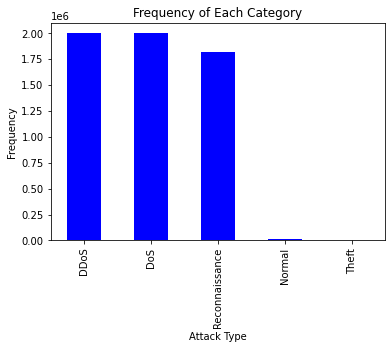

In [6]:
# Plot frequency of each attack 
freq.plot(kind='bar', color='blue')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')
plt.show()

In [17]:
# Get number of rows and name of columns
print(bot.shape)
print(bot.columns)

# Get if nulls or not
print(bot.isnull().sum())

(5832769, 15)
Index(['proto', 'saddr', 'sport', 'daddr', 'dport', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'state', 'stime', 'ltime', 'dur', 'attack', 'category'],
      dtype='object')
proto          0
saddr          0
sport       1045
daddr          0
dport       1045
spkts          0
dpkts          0
sbytes         0
dbytes         0
state          0
stime          0
ltime          0
dur            0
attack         0
category       0
dtype: int64


I also downloaded the dataset from another webpage, just to make sure they both contain the same content. The following has been extracted from https://www.kaggle.com/datasets/dhoogla/nfbotiot.

In [7]:
!pip install pyarrow 
!pip install fastparquet


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached fastparquet-2023.10.1-cp38-cp38-win_amd64.whl (668 kB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\UX430\\AppData\\Local\\Temp\\pip-uninstall-hexc7kgk\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas.core.arrays as pa

In [9]:
bot2 = pd.read_parquet('C:/Users/UX430/Documents/thesis/datasets/Bot-IoT/NF-BoT-IoT.parquet')

In [10]:
bot2

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,52670,53,17,5.212000,71,126,1,1,0,4294966,0,Benign
1,49160,4444,6,0.000000,217753000,199100,4521,4049,24,4176249,1,Theft
2,3456,80,17,0.000000,8508021,8918372,9086,9086,0,4175916,0,Benign
3,80,8080,6,7.000000,8442138,9013406,9086,9086,0,4175916,0,Benign
4,80,80,6,7.000000,8374706,0,9086,0,0,4175916,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...
595371,80,80,6,7.000000,2330065,0,2523,0,0,4263037,0,Benign
595372,0,0,6,0.000000,1054423,0,1513,0,0,4263062,0,Benign
595373,365,565,17,0.000000,62422,0,1357,0,0,4263062,0,Benign
595374,50850,8883,6,222.177994,11300,1664,32,32,24,4264935,0,Benign


In [12]:
# Get frequency of Attack Type
freq2 = bot2['Attack'].value_counts()
freq2

Attack
Reconnaissance    467215
DDoS               56260
DoS                56249
Benign             13803
Theft               1849
Name: count, dtype: int64

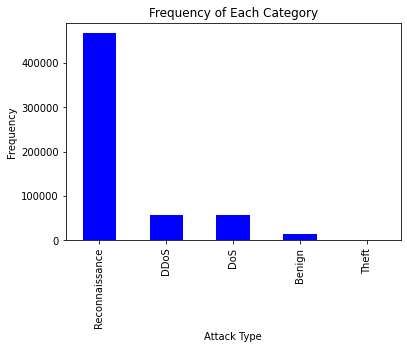

In [13]:
#Plot frequency of each attack
freq2.plot(kind='bar', color='blue')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')
plt.show()

In [14]:
#Check for null types in the dataset
bot2.isnull().sum()

L4_SRC_PORT                   0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
dtype: int64

In [15]:
# Names of all columns 
bot2.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [16]:
# Number of rows
len(bot2)

595376